In [ ]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, confusion_matrix
import joblib

# Load data
train_df = pd.read_csv("Titanic_train.csv")
test_df = pd.read_csv("Titanic_test.csv")

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

train_df.head()

print(train_df.info())
print(train_df.isnull().sum())
train_df.describe()


Train shape: (891, 12)
Test shape: (418, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabi

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Visualizations


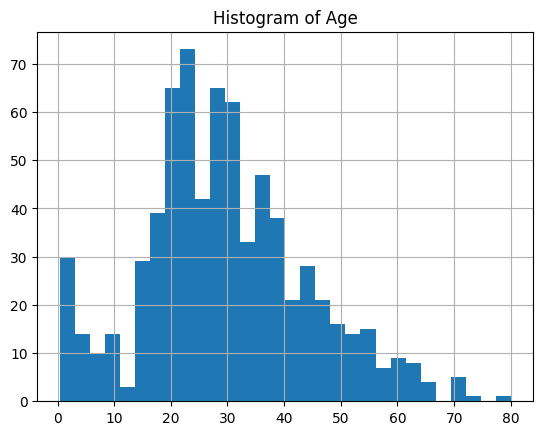

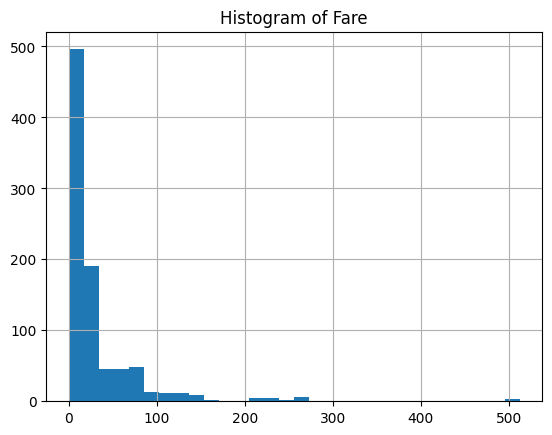

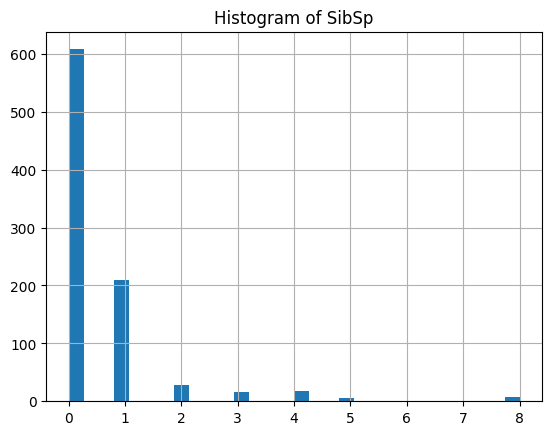

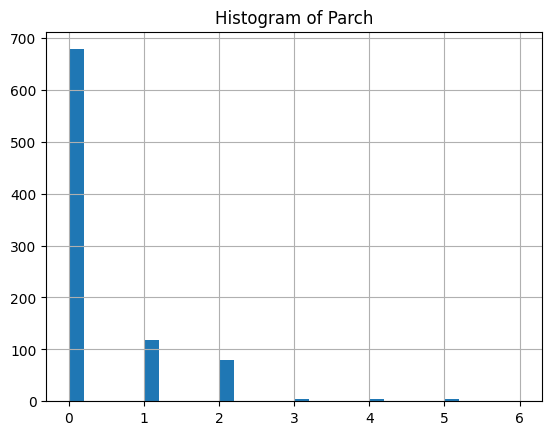

/tmp/ipython-input-3692333616.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([notsurv_vals, survived_vals], labels=["Not Survived","Survived"])


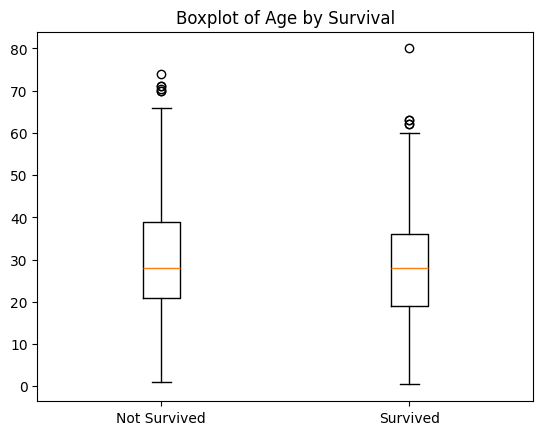

/tmp/ipython-input-3692333616.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([notsurv_vals, survived_vals], labels=["Not Survived","Survived"])


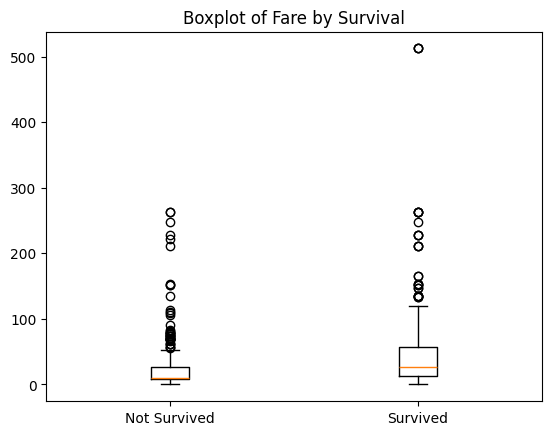

/tmp/ipython-input-3692333616.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([notsurv_vals, survived_vals], labels=["Not Survived","Survived"])


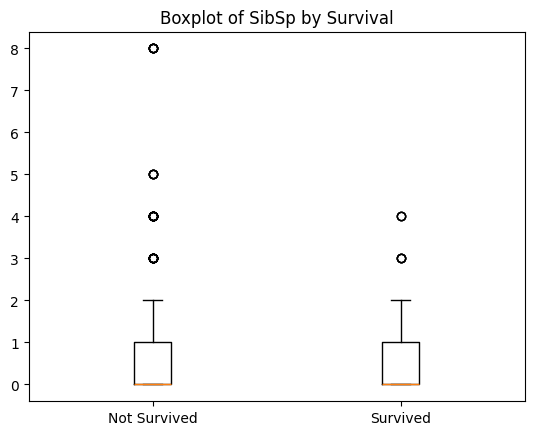

/tmp/ipython-input-3692333616.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([notsurv_vals, survived_vals], labels=["Not Survived","Survived"])


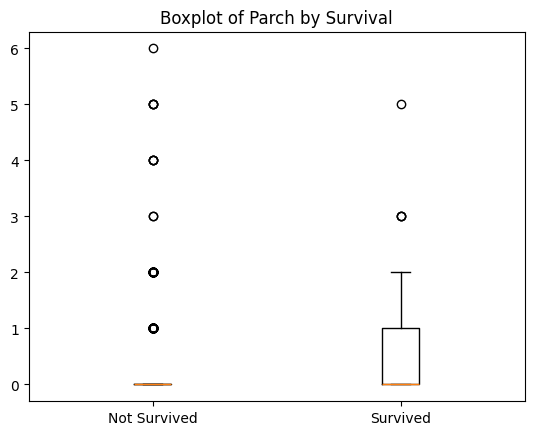

In [ ]:
numeric_cols = ["Age","Fare","SibSp","Parch"]

# Histograms
for col in numeric_cols:
    plt.figure()
    train_df[col].hist(bins=30)
    plt.title(f"Histogram of {col}")
    plt.show()

# Boxplots vs Survived
for col in numeric_cols:
    plt.figure()
    survived_vals = train_df[train_df["Survived"]==1][col].dropna()
    notsurv_vals = train_df[train_df["Survived"]==0][col].dropna()
    plt.boxplot([notsurv_vals, survived_vals], labels=["Not Survived","Survived"])
    plt.title(f"Boxplot of {col} by Survival")
    plt.show()


# Relationships

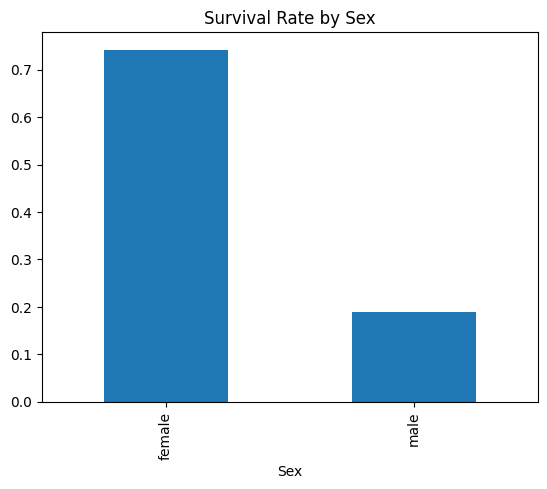

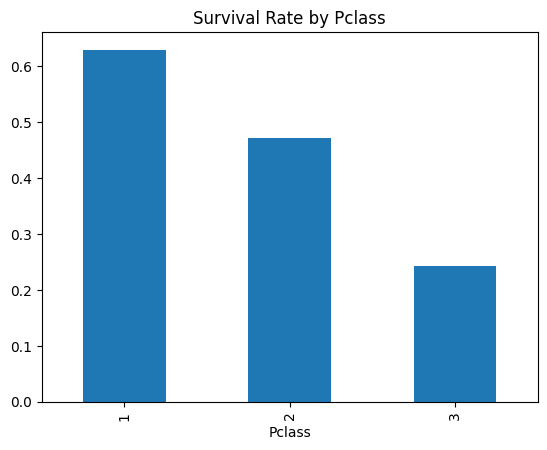

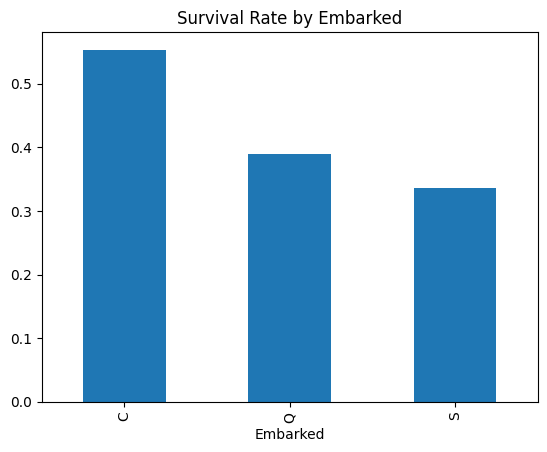

In [ ]:
for col in ["Sex","Pclass","Embarked"]:
    plt.figure()
    rate = train_df.groupby(col)["Survived"].mean()
    rate.plot(kind="bar")
    plt.title(f"Survival Rate by {col}")
    plt.show()


# Data Preprocessing

In [ ]:
def extract_title(name):
    try:
        return name.split(",")[1].split(".")[0].strip()
    except:
        return "Unknown"

def preprocess(df):
    df = df.copy()

    # Extract Title
    df["Title"] = df["Name"].apply(extract_title)

    # Family features
    df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
    df["IsAlone"] = (df["FamilySize"]==1).astype(int)

    # Handle missing
    df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
    df["Age"].fillna(df["Age"].median(), inplace=True)
    if "Fare" in df.columns:
        df["Fare"].fillna(df["Fare"].median(), inplace=True)

    # Drop unneeded
    df.drop(columns=["Name","Ticket","Cabin"], inplace=True, errors="ignore")

    # Encode categoricals
    df = pd.get_dummies(df, drop_first=True)

    return df

train_pid = train_df["PassengerId"]
test_pid = test_df["PassengerId"]

proc_train = preprocess(train_df)
proc_test = preprocess(test_df)

# Align columns
X = proc_train.drop(columns=["Survived"])
y = proc_train["Survived"]

missing_cols = set(X.columns) - set(proc_test.columns)
for c in missing_cols:
    proc_test[c] = 0
proc_test = proc_test[X.columns]


/tmp/ipython-input-1147823997.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
/tmp/ipython-input-1147823997.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

# Model Building

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

print("Model trained with", X_train.shape[1], "features")


Model trained with 27 features


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# model Evaluation

In [ ]:
y_pred = clf.predict(X_val)
y_proba = clf.predict_proba(X_val)[:,1]

print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))
print("ROC-AUC:", roc_auc_score(y_val, y_proba))

print("\nClassification Report:\n", classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))


Accuracy: 0.8379888268156425
Precision: 0.8125
Recall: 0.7536231884057971
F1 Score: 0.7819548872180451
ROC-AUC: 0.8760210803689065

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       110
           1       0.81      0.75      0.78        69

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179

Confusion Matrix:
 [[98 12]
 [17 52]]


# Roc Curve

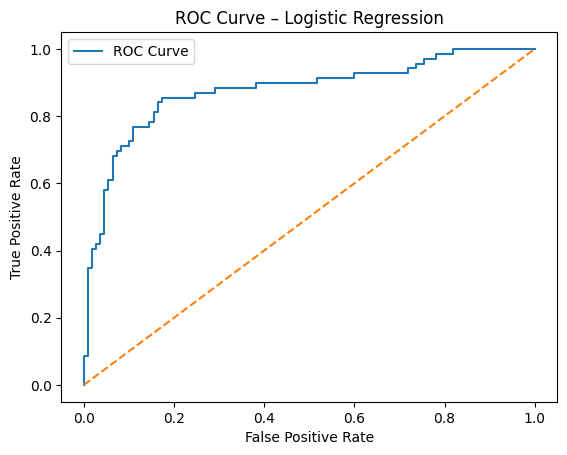

In [ ]:
fpr, tpr, _ = roc_curve(y_val, y_proba)
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0,1],[0,1],"--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Logistic Regression")
plt.legend()
plt.show()


# interpretation of coefficients

In [ ]:
coef_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": clf.coef_[0]
}).sort_values("Coefficient", key=abs, ascending=False)

coef_df.head(20)


,Feature,Coefficient
17,Title_Master,1.624644
8,Sex_male,-1.306816
21,Title_Mr,-1.167312
24,Title_Rev,-1.037710
1,Pclass,-0.983704
22,Title_Mrs,0.909656
3,SibSp,-0.580619
12,Title_Don,-0.561029
14,Title_Jonkheer,-0.528452
16,Title_Major,0.455616


# Deployment

In [ ]:
# Retrain on all training data
final_clf = LogisticRegression(max_iter=1000)
final_clf.fit(X, y)
joblib.dump(final_clf, "model.pkl")

# Predictions for submission
test_pred = final_clf.predict(proc_test)
submission = pd.DataFrame({"PassengerId": test_pid, "Survived": test_pred})
submission.to_csv("titanic_submission.csv", index=False)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 61.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 86.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.6 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import pandas as pd
import joblib

st.title("🚢 Titanic Survival Predictor")

model = joblib.load("model.pkl")

pclass = st.selectbox("Pclass", [1,2,3])
sex = st.selectbox("Sex", ["male","female"])
age = st.slider("Age", 0, 100, 25)
sibsp = st.number_input("SibSp", 0, 10, 0)
parch = st.number_input("Parch", 0, 10, 0)
fare = st.number_input("Fare", 0.0, 600.0, 32.2)
embarked = st.selectbox("Embarked", ["S","C","Q"])
title = st.selectbox("Title", ["Mr","Mrs","Miss","Master","Dr","Other"])

# (Preprocess input similarly as training before prediction...)

if st.button("Predict"):
    proba = model.predict_proba([[...]])[0,1]
    st.write("Survival Probability:", round(proba,3))


2025-08-18 14:38:28.329 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-18 14:38:28.804 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-08-18 14:38:28.810 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-18 14:38:28.814 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-18 14:38:28.820 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-18 14:38:28.823 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-18 14:38:28.825 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-18 14:38:28.828 Thread 'MainThread': mi

# Interview Questions

## 1. What is the difference between Precision and Recall?

Precision:
The proportion of true positive predictions out of all positive predictions made by the model.

Precision = True Positives/True Positives + False Positives



It measures the accuracy of positive predictions.

Recall (Sensitivity):
The proportion of true positive predictions out of all actual positive cases.

Recall = True Positives/True Positives + False Negatives



It measures the model’s ability to detect all positive instances.

⚡ When to prioritize:

High Precision: When false positives are costly (e.g., spam filter where marking a legitimate email as spam is bad).

High Recall: When missing positive cases is costly (e.g., disease detection where missing a sick patient is dangerous).

## 2. What is Cross-Validation, and Why Is It Important in Binary Classification?

Cross-Validation is a model evaluation method where the dataset is split into multiple subsets (folds).
The model is trained on some folds and validated on the remaining fold, rotating so every subset is used for validation once.

Example: Stratified K-Fold Cross-Validation ensures that each fold keeps the same proportion of class labels as the full dataset (important in imbalanced binary classification).